# Comparaison between...

In [22]:
import example
import ipywidgets
import mdp
from tqdm.notebook import tqdm
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

In [23]:
# Function to create a masked array
def masked_arr(n_iter, max_iter):
    arr = ma.empty((n_iter, max_iter))
    arr.mask = True
    return arr

# Function to create a list of masked arrays
def create_arr(n_iter, max_iter, n_exp=1):
    return [masked_arr(n_iter, max_iter) for _ in range(n_exp)]


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def last_iter_mskd(msk):
    falses = np.where(~msk)
    id = [np.searchsorted(falses[0], i, side='right')-1 for i in range(np.shape(msk)[0])]
    idy = [falses[1][id[i]] for i in range(np.shape(msk)[0])]
    return idy


# Q learning

In [24]:
# Function that will apply Q learning. l should be a list. 
def runQ(n_iter, P, R, gamma, mode, max_iter, exampleName, lambdas=[1], fill_value=-99999):
    # n_iter: number of repetitions of the algorithm
    # P and R: transition probabilities; reward matrix
    # gamma: discout value 0<=gamma<=1
    # mode: 0, 1, 2 (maximizing, satisficing, satisficing with minimal variance)
    # max_iter: int, specificing number of iterations in algorihm
    # lambdas: list of floats, with every value between 0 and 1
    # fill_value: large value that is different form all output
    # exampleName: str, name of example

    arr_list = create_arr(n_iter, max_iter, len(lambdas))
    for i in range(n_iter):
        for j in range(len(arr_list)):
            Q = mdp.QLearning(P, R, gamma, mode = mode, plot = True, l = lambdas[j], n_iter = max_iter)
            Q.run()
            arr_list[j][i, 0:len(Q.vlist)] = Q.vlist
    
    for j in range(len(arr_list)):
        fileName = str('Q_') + str(exampleName) + str('_mode=') + str(mode) + str('_l=') + str(lambdas[j]) + str('_n_iter=') + str(n_iter) + str('_max_iter=') + str(max_iter) + str('_fill_value=') + str(fill_value) + str('.csv')
        np.savetxt("saves/" + fileName, arr_list[j].filled(fill_value=fill_value), delimiter = ",")

    

# Policy Iteration

In [25]:
# Function that will apply policy iteration. l should be a list. 
def runPI(n_iter, P, R, gamma, mode, max_iter, exampleName, lambdas=[1], fill_value=-99999):
    # n_iter: number of repetitions of the algorithm
    # P and R: transition probabilities; reward matrix
    # gamma: discout value 0<=gamma<=1
    # mode: 0, 1, 2 (maximizing, satisficing, satisficing with minimal variance)
    # max_iter: int, specificing number of iterations in algorihm
    # lambdas: list of floats, with every value between 0 and 1
    # fill_value: large value that is different form all output
    # exampleName: str, name of example

    arr_list = create_arr(n_iter, max_iter, len(lambdas))
    for i in tqdm(range(n_iter)):
        for j in tqdm(range(len(lambdas))):
            PI = mdp.PolicyIteration(transitions=P, reward=R, discount=gamma, mode = mode, plot = True, l = lambdas[j], max_iter = max_iter)
            PI.run()
            arr_list[j][i, 0:len(PI.vlist)] = PI.vlist
    
    for j in range(len(lambdas)):
        fileName = str('PI_') + str(exampleName) + str('_mode=') + str(mode) + str('_l=') + str(lambdas[j]) + str('_n_iter=') + str(n_iter) + str('_max_iter=') + str(max_iter) + str('_fill_value=') + str(fill_value) + str('.csv')
        np.savetxt("saves/" + fileName, arr_list[j].filled(fill_value=fill_value), delimiter = ",")

# Running

In [6]:
n_iter = 100
max_iter = 100000
P, R, _ = example.smallMDP()
gamma = 0.5
mode = 1
lambdas = [0, 1]
# fill_value = -99999
exampleName = 'smallMDP'


runQ(n_iter, P, R, gamma, max_iter, exampleName)

TypeError: runQ() missing 1 required positional argument: 'exampleName'

In [ ]:
n_iter = 10
max_iter = 1000
P, R, _ = example.smallMDP()
gamma = 0.5
mode = 2
lambdas = [0, 0.25, 0.5, 0.75, 1]
# fill_value = -99999
exampleName = 'smallMDP'

runPI(n_iter, P, R, gamma, mode, max_iter, exampleName, lambdas)

In [80]:
n_iter = 1
max_iter = 10000
P, R, _ = example.smallMDP()
gamma = 0.5
mode = 0
lambdas = [1]
# fill_value = -99999
exampleName = 'smallMDP'

runQ(n_iter, P, R, gamma, mode, max_iter, exampleName, lambdas)


In [ ]:
# Function that will apply Q learning. l should be a list. 
def runQ_rand(n_iter, gamma, mode, max_iter, exampleName, lambdas=[1], fill_value=-99999):
    # n_iter: number of repetitions of the algorithm
    # P and R: transition probabilities; reward matrix
    # gamma: discout value 0<=gamma<=1
    # mode: 0, 1, 2 (maximizing, satisficing, satisficing with minimal variance)
    # max_iter: int, specificing number of iterations in algorihm
    # lambdas: list of floats, with every value between 0 and 1
    # fill_value: large value that is different form all output
    # exampleName: str, name of example

    
    
    arr_list = create_arr(n_iter, max_iter, len(lambdas))
    for i in range(n_iter):
        P, R = example.rand(2, 5)
        for j in range(len(arr_list)):
            Q = mdp.QLearning(P, R, gamma, mode = mode, plot = True, l = lambdas[j], n_iter = max_iter)
            Q.run()
            arr_list[j][i, 0:len(Q.vlist)] = Q.vlist
    
    for j in range(len(arr_list)):
        fileName = str('Q_') + str(exampleName) + str('_l=') + str(lambdas[j]) + str('_n_iter=') + str(n_iter) + str('_max_iter=') + str(max_iter) + str('.csv')
        np.savetxt("saves/" + fileName, arr_list[j].filled(fill_value=fill_value), delimiter = ",")
        

n_iter = 100
max_iter = 100000
gamma = 0.5
mode = 1
lambdas = [0, 0.25, 0.5, 0.75, 1]
# fill_value = -99999
exampleName = 'rand'


runQ_rand(n_iter, gamma, mode, max_iter, exampleName, lambdas)
        


# Plotting

In [36]:
def plotting(fileList, labels, colors, title, axisLabels = ['Iterations', 'Average of value function of starting state'], fill_value=-99999):
    # fileList: list of str with names of files that need to be plotted
    # fill_value: value used in runQ/runQ_org/runPI/runPI_org
    # labels: list of str with labels needed for files
    # colors: list of colors used in plot
    # axisLabels: list of str with labels for axes
    # title: str of title
    arr_list = list(map(lambda f : np.loadtxt("saves/" + str(f), delimiter=',', dtype=float), fileList))
    arr_list_msk = [ma.masked_equal(arr_list[i], fill_value) for i in range(len(fileList))]

    v_last = []
    arr_list_mskfill = []
    arr_list_mean = []
    arr_list_std = []
    for i in range(len(fileList)):
        if ma.getmask(arr_list_msk[i]) is not ma.nomask:
            n_unmsk = np.shape(arr_list_msk[i])[1] - np.sum(ma.getmask(arr_list_msk[i]), axis = 1)
            v_last = arr_list_msk[i][np.arange(len(arr_list_msk[i])), last_iter_mskd(ma.getmask(arr_list_msk[i]))]
            arr_list_mskfill.append(np.array([arr_list_msk[i][j, :].filled(fill_value=v_last[j])[:(n_unmsk[j] + 10)] for j in range(np.shape(arr_list_msk[i])[0])]))
            if arr_list_msk[i].ndim == 1:
                arr_list_mean.append(arr_list_mskfill[i])
                arr_list_std.append(arr_list_mskfill[i])
            else:
                arr_list_mean.append(arr_list_mskfill[i].mean(axis = 0))
                arr_list_std.append(arr_list_mskfill[i].std(axis = 0))
        else:
            if arr_list_msk[i].ndim == 1:
                arr_list_mean.append(arr_list_msk[i])
                arr_list_std.append(arr_list_msk[i])
            else:
                arr_list_mean.append(arr_list_msk[i].mean(axis = 0))
                arr_list_std.append(arr_list_msk[i].std(axis = 0))
    fig, ax = plt.subplots(1, figsize = (5, 5))
    for i in range(len(fileList)):
        ax.plot(np.arange(len(arr_list_mean[i])), arr_list_mean[i], label = labels[i], color = colors[i])
        ax.fill_between(np.arange(len(arr_list_mean[i])), arr_list_mean[i] - arr_list_std[i], arr_list_mean[i] + arr_list_std[i], alpha = 0.5, color = colors[i])

    ax.legend(loc = 1)
    plt.xlabel(axisLabels[0])
    plt.ylabel(axisLabels[1])
    plt.title(title)


In [45]:
def plotting_trans_diff(fileList, labels, colors, title, axisLabels = ['Iterations', 'Average of log((V_last - V_t)^2)'], fill_value=-99999):
    # fileList: list of str with names of files that need to be plotted
    # fill_value: value used in runQ/runQ_org/runPI/runPI_org
    # labels: list of str with labels needed for files
    # colors: list of colors used in plot
    # axisLabels: list of str with labels for axes
    # title: str of title
    
    arr_list = list(map(lambda f : np.loadtxt("saves/" + f, delimiter=',', dtype=float), fileList))
    arr_list_msk = [ma.masked_equal(arr_list[i], fill_value) for i in range(len(fileList))]

    v_last = []
    for i in range(len(fileList)):
        if ma.getmask(arr_list_msk[i]) is ma.nomask:
            v_last.append(arr_list_msk[i][:, -1].reshape((np.shape(arr_list_msk[0])[0], 1)))
        else:
            v_last.append(arr_list_msk[i][np.arange(len(arr_list_msk[i])), last_iter_mskd(ma.getmask(arr_list_msk[i]))].reshape((np.shape(arr_list_msk[0])[0], 1)))
            
    arr_list_mean = [np.log((arr_list_msk[i] - v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
    arr_list_std = [np.log((arr_list_msk[i] - v_last[i])**2).std(axis = 0) for i in range(len(fileList))]

    fig, ax = plt.subplots(1, figsize = (5, 5))
    for i in range(len(fileList)):
        ax.plot(np.arange(len(arr_list_mean[i])), arr_list_mean[i], label = labels[i], color = colors[i])
        ax.fill_between(np.arange(len(arr_list_std[i])), arr_list_mean[i] - arr_list_std[i], arr_list_mean[i] + arr_list_std[i], alpha = 0.5, color = colors[i])

    ax.legend()
    plt.xlabel(axisLabels[0])
    plt.ylabel(axisLabels[1])
    plt.title(title)

In [48]:
def plotting_trans_div_runAv(fileList, labels, colors, title, axisLabels = ['Iterations', 'Running average of average of 0.5 * log((1 - V_t/V_last)**2)'], fill_value=-99999):
    # fileList: list of str with names of files that need to be plotted
    # fill_value: value used in runQ/runQ_org/runPI/runPI_org
    # labels: list of str with labels needed for files
    # colors: list of colors used in plot
    # axisLabels: list of str with labels for axes
    # title: str of title
    arr_list = list(map(lambda f : np.loadtxt("saves/" + f, delimiter=',', dtype=float), fileList))
    arr_list_msk = [ma.masked_equal(arr_list[i], fill_value) for i in range(len(fileList))]
    
    v_last = []
    for i in range(len(fileList)):
        if ma.getmask(arr_list_msk[i]) is ma.nomask:
            v_last.append(arr_list_msk[i][:, -1].reshape((np.shape(arr_list_msk[0])[0], 1)).reshape((np.shape(arr_list_msk[0])[0], 1)))
        else:
            v_last.append(arr_list_msk[i][np.arange(len(arr_list_msk[i])), last_iter_mskd(ma.getmask(arr_list_msk[i]))].reshape((np.shape(arr_list_msk[0])[0], 1)))
    # v_last = [arr_list_msk[i][:, -1000:].mean(axis = 1).reshape((np.shape(arr_list_msk[0])[0], 1))for i in range(len(fileList))]
    arr_list_mean = [0.5*np.log((1 - arr_list_msk[i][:, 0:2000]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
    arr_list_std = [0.5*np.log((1 - arr_list_msk[i][:, 0:2000]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]
    # arr_list_mean = [0.5*np.log((1 - arr_list_msk[i]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
    # arr_list_std = [0.5*np.log((1 - arr_list_msk[i]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]
    run_mean = [running_mean(arr_list_mean[i], 20) for i in range(len(fileList))]
    run_mean_std = [running_mean(arr_list_std[i], 20) for i in range(len(fileList))]
    fig, ax = plt.subplots(1, figsize = (5, 5))
    for i in range(len(fileList)):
        ax.plot(np.arange(len(run_mean[i])), run_mean[i], label = labels[i], color = colors[i])
        ax.fill_between(np.arange(len(run_mean_std[i])), run_mean[i] - run_mean_std[i], run_mean[i] + run_mean_std[i], alpha = 0.5, color = colors[i])

    ax.legend()
    plt.xlabel(axisLabels[0])
    plt.ylabel(axisLabels[1])
    plt.title(title)


In [41]:
def plotting_trans_div(fileList, labels, colors, title, axisLabels = ['Iterations', 'Average of 0.5 * log((1 - V_t/V_last)**2)'], fill_value=-99999):
    # fileList: list of str with names of files that need to be plotted
    # fill_value: value used in runQ/runQ_org/runPI/runPI_org
    # labels: list of str with labels needed for files
    # colors: list of colors used in plot
    # axisLabels: list of str with labels for axes
    # title: str of title
    arr_list = list(map(lambda f : np.loadtxt("saves/" + f, delimiter=',', dtype=float), fileList))
    arr_list_msk = [ma.masked_equal(arr_list[i], fill_value) for i in range(len(fileList))]
    
    v_last = []
    for i in range(len(fileList)):
        if ma.getmask(arr_list_msk[i]) is ma.nomask:
            v_last.append(arr_list_msk[i][:, -1].reshape((np.shape(arr_list_msk[0])[0], 1)).reshape((np.shape(arr_list_msk[0])[0], 1)))
        else:
            v_last.append(arr_list_msk[i][np.arange(len(arr_list_msk[i])), last_iter_mskd(ma.getmask(arr_list_msk[i]))].reshape((np.shape(arr_list_msk[0])[0], 1)))
    
    arr_list_nomsk = [arr_list_msk[i].filled(fill_value=v_last[i]) for i in range(len(fileList))]
    
    # arr_list_mean = [0.5*np.log((1 - arr_list_nomsk[i][:, 0:2000]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
    # arr_list_std = [0.5*np.log((1 - arr_list_nomsk[i][:, 0:2000]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]
    arr_list_mean = [0.5*np.log((1 - arr_list_nomsk[i]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
    arr_list_std = [0.5*np.log((1 - arr_list_nomsk[i]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]
    
    fig, ax = plt.subplots(1, figsize = (5, 5))
    for i in range(len(fileList)):
        ax.plot(np.arange(len(arr_list_mean[i])), arr_list_mean[i], label = labels[i], color = colors[i])
        ax.fill_between(np.arange(len(arr_list_std[i])), arr_list_mean[i] - arr_list_std[i], arr_list_mean[i] + arr_list_std[i], alpha = 0.5, color = colors[i])

    ax.legend()
    plt.xlabel(axisLabels[0])
    plt.ylabel(axisLabels[1])
    plt.title(title)

# Random MDP - Q learning - n_iter=100 - max_iter = 100000 - different MDP every run

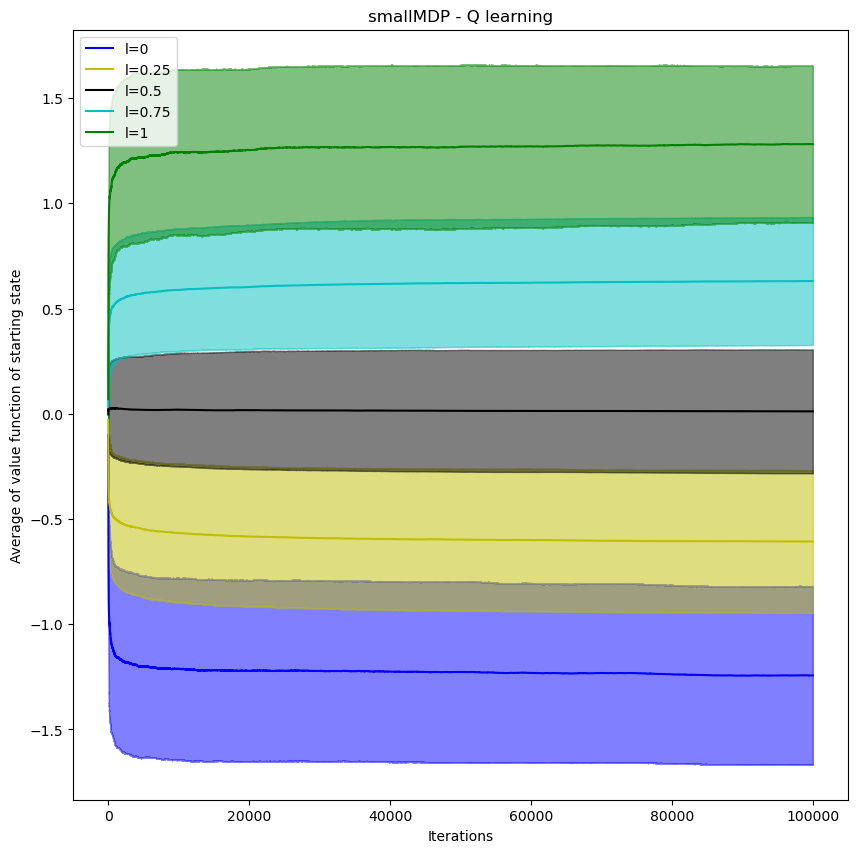

In [65]:
fileList = ['Q_rand_l=0_n_iter=100_max_iter=100000.csv', 'Q_rand_l=0.25_n_iter=100_max_iter=100000.csv', 'Q_rand_l=0.5_n_iter=100_max_iter=100000.csv', 'Q_rand_l=0.75_n_iter=100_max_iter=100000.csv', 'Q_rand_l=1_n_iter=100_max_iter=100000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Q learning'

plotting(fileList, labels, colors, title)

/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_33067/561405783.py:20: RuntimeWarning: divide by zero encountered in log
  arr_list_mean = [0.5*np.log((1 - arr_list_msk[i]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_33067/561405783.py:21: RuntimeWarning: divide by zero encountered in log
  arr_list_std = [0.5*np.log((1 - arr_list_msk[i]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]


12618692.696157448


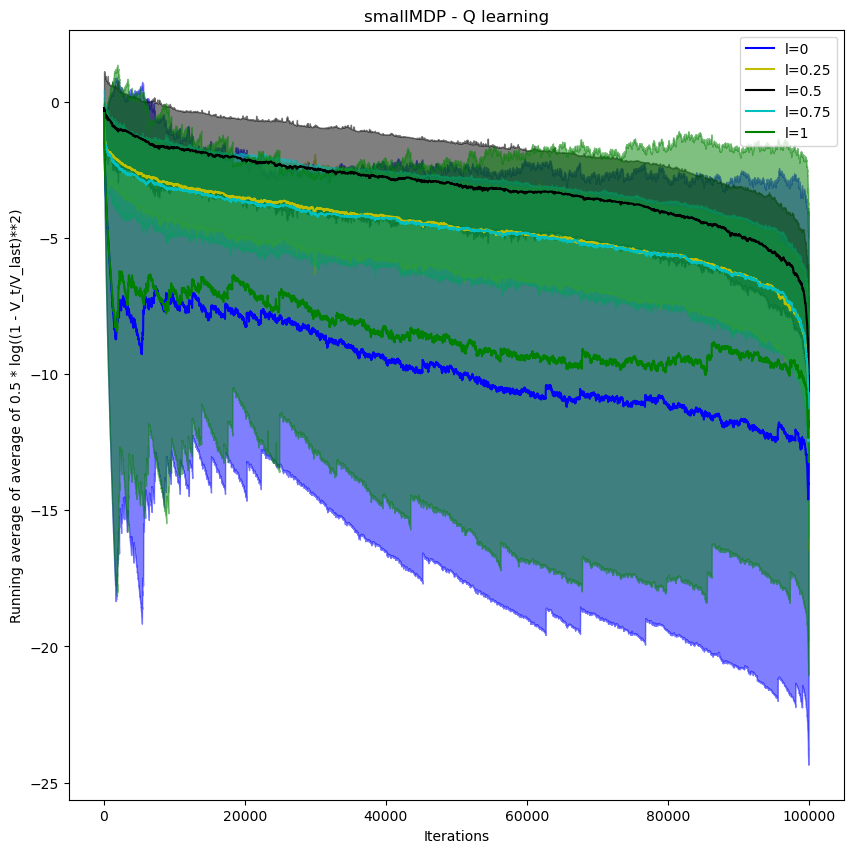

In [66]:
fileList = ['Q_rand_l=0_n_iter=100_max_iter=100000.csv', 'Q_rand_l=0.25_n_iter=100_max_iter=100000.csv', 'Q_rand_l=0.5_n_iter=100_max_iter=100000.csv', 'Q_rand_l=0.75_n_iter=100_max_iter=100000.csv', 'Q_rand_l=1_n_iter=100_max_iter=100000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Q learning'

plotting_trans_div_runAv(fileList, labels, colors, title)

# smallMDP - Q learning - n_iter=100 - max_iter=100000

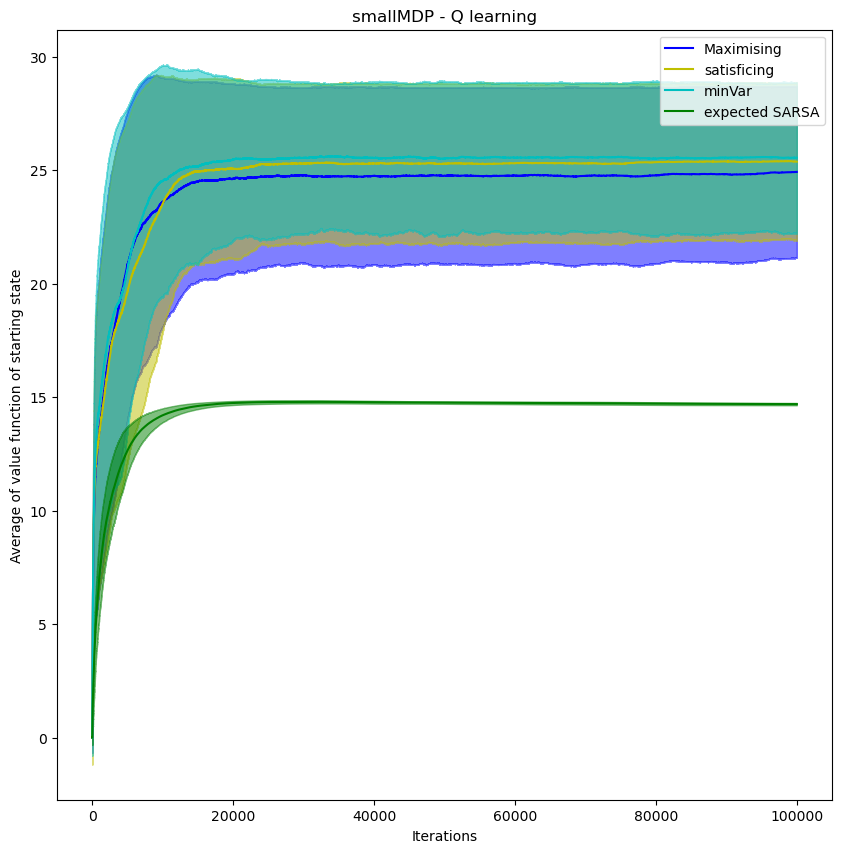

In [30]:
fileList = ['Q_smallMDP_mode=0_l=1_n_iter=100_max_iter=100000_fill_value=-99999.csv', 'Q_smallMDP_mode=1_l=1_n_iter=100_max_iter=100000_fill_value=-99999.csv', 'Q_smallMDP_mode=2_l=1_n_iter=50_max_iter=100000_fill_value=-99999.csv', 'Q_smallMDP_mode=3_l=1_n_iter=100_max_iter=100000_fill_value=-99999.csv']
labels = ['Maximising', 'satisficing', 'minVar', 'expected SARSA']
colors = ['b', 'y', 'c', 'g', 'k']
title = 'smallMDP - Q learning'

plotting(fileList, labels, colors, title)

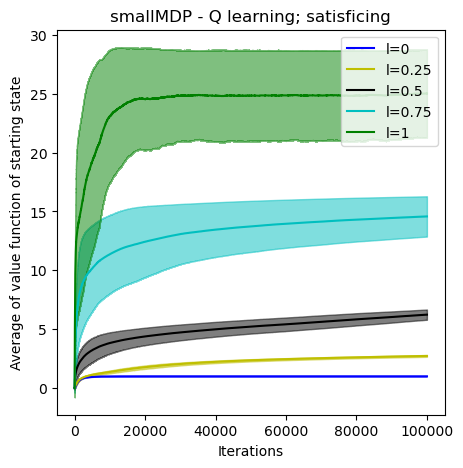

In [43]:
fileList = ['Q_smallMDP0-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP025-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP05-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP075-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP1-n_iter=100-max_iter_Q=100000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Q learning; satisficing'

plotting(fileList, labels, colors, title)

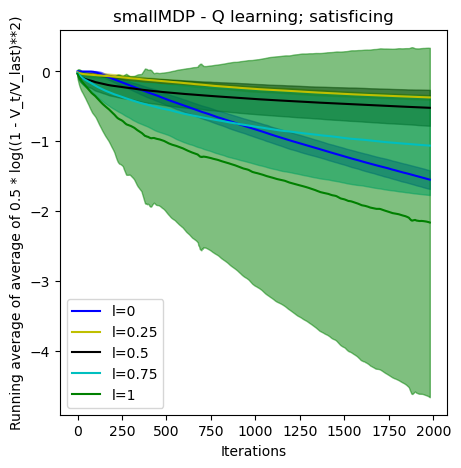

In [49]:
fileList = ['Q_smallMDP0-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP025-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP05-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP075-n_iter=100-max_iter_Q=100000.csv', 'Q_smallMDP1-n_iter=100-max_iter_Q=100000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Q learning; satisficing'

plotting_trans_div_runAv(fileList, labels, colors, title)

# Random MDP - Q learning - n_iter=100 - max_iter_Q=1000000

/Applications/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Applications/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


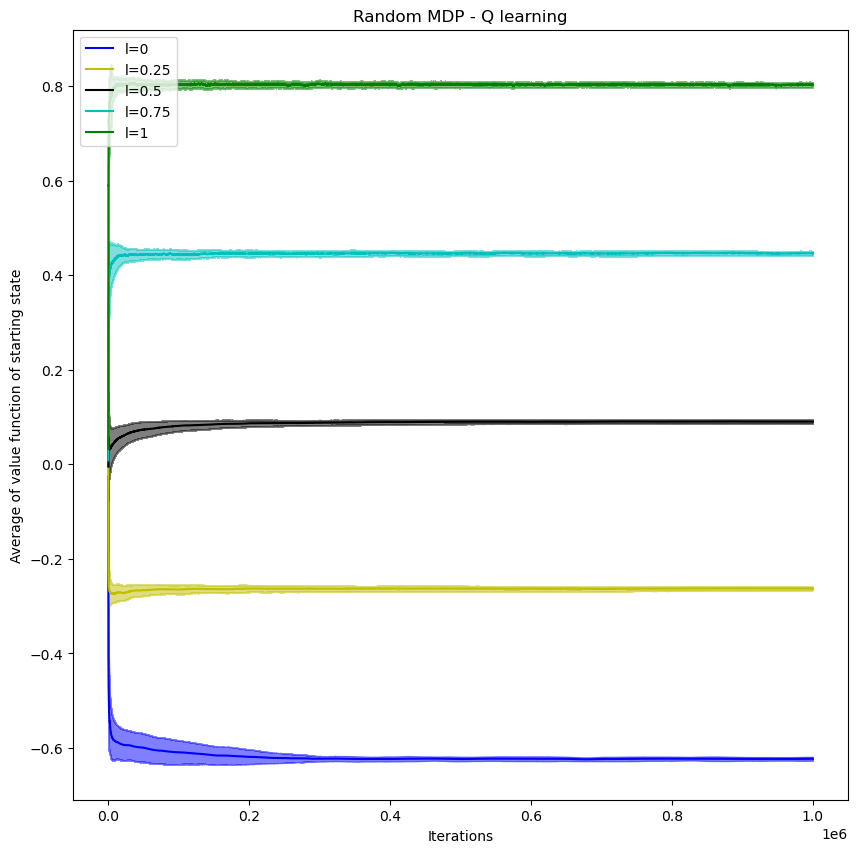

In [71]:
fileList = ['Q_rand0-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand025-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand05-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand075-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand1-n_iter=100-max_iter_Q=1000000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'Random MDP - Q learning'


plotting(fileList, labels, colors, title)

/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_33067/377915642.py:19: RuntimeWarning: divide by zero encountered in log
  arr_list_mean = [np.log((arr_list_msk[i] - v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_33067/377915642.py:20: RuntimeWarning: divide by zero encountered in log
  arr_list_std = [np.log((arr_list_msk[i] - v_last[i])**2).std(axis = 0) for i in range(len(fileList))]


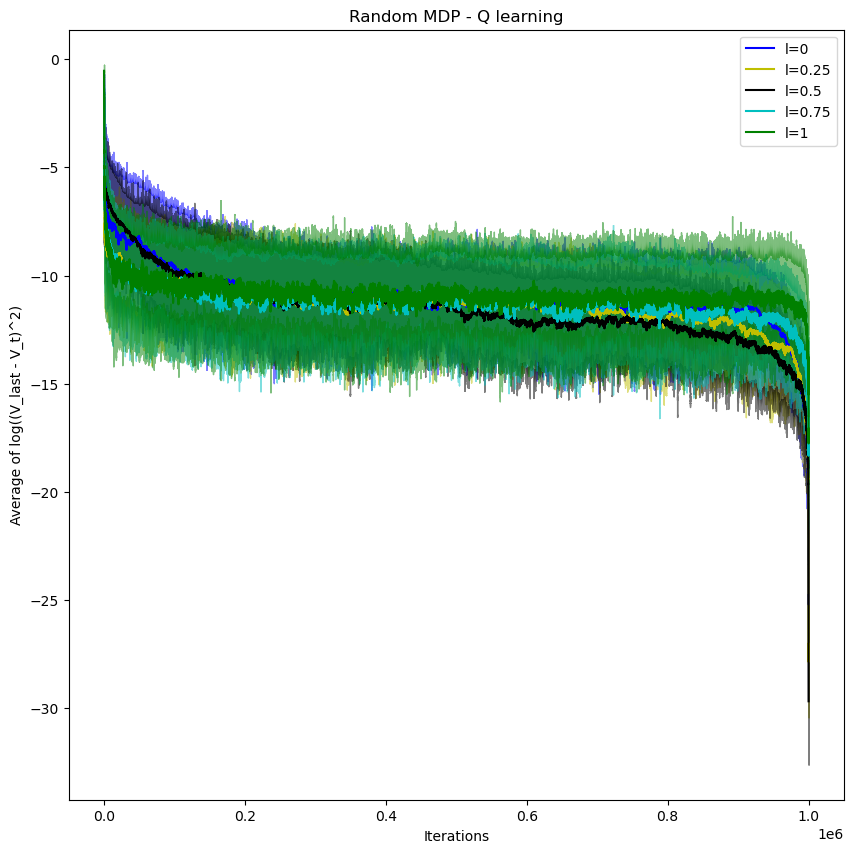

In [73]:
fileList = ['Q_rand0-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand025-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand05-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand075-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand1-n_iter=100-max_iter_Q=1000000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'Random MDP - Q learning'

plotting_trans_diff(fileList, labels, colors, title)

/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_33067/561405783.py:20: RuntimeWarning: divide by zero encountered in log
  arr_list_mean = [0.5*np.log((1 - arr_list_msk[i]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_33067/561405783.py:21: RuntimeWarning: divide by zero encountered in log
  arr_list_std = [0.5*np.log((1 - arr_list_msk[i]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]


80327837.73278512


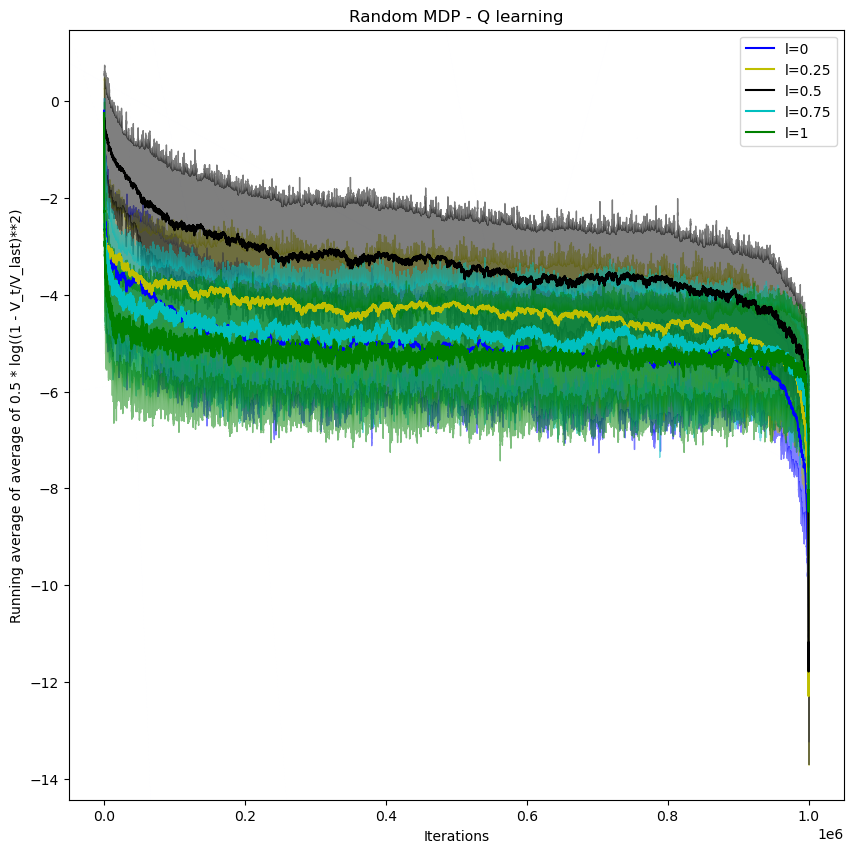

In [74]:
fileList = ['Q_rand0-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand025-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand05-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand075-n_iter=100-max_iter_Q=1000000.csv', 'Q_rand1-n_iter=100-max_iter_Q=1000000.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'Random MDP - Q learning'

plotting_trans_div_runAv(fileList, labels, colors, title)

# Small MDP - Policy Iteration - n_iter=100 - max_iter_PI=1000

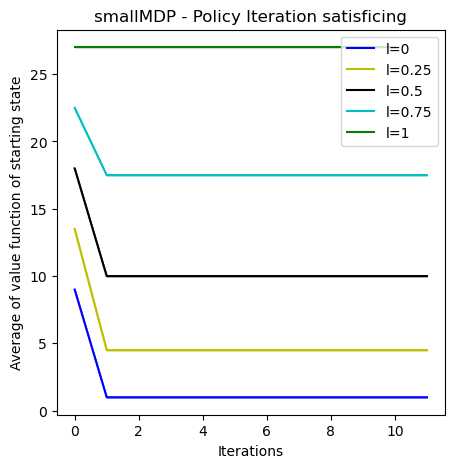

In [35]:
fileList = ['PI_smallMDP_l=0_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=0.25_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=0.5_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=0.75_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=1_n_iter=100_max_iter=1000_fill_value=-99999.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Policy Iteration satisficing'

plotting(fileList, labels, colors, title)

/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_46375/2187147420.py:22: RuntimeWarning: divide by zero encountered in log
  arr_list_mean = [0.5*np.log((1 - arr_list_nomsk[i]/v_last[i])**2).mean(axis = 0) for i in range(len(fileList))]
/var/folders/lj/p1rb7j_52lq6cn4gm0tw9ytm0000gn/T/ipykernel_46375/2187147420.py:23: RuntimeWarning: divide by zero encountered in log
  arr_list_std = [0.5*np.log((1 - arr_list_nomsk[i]/v_last[i])**2).std(axis = 0) for i in range(len(fileList))]


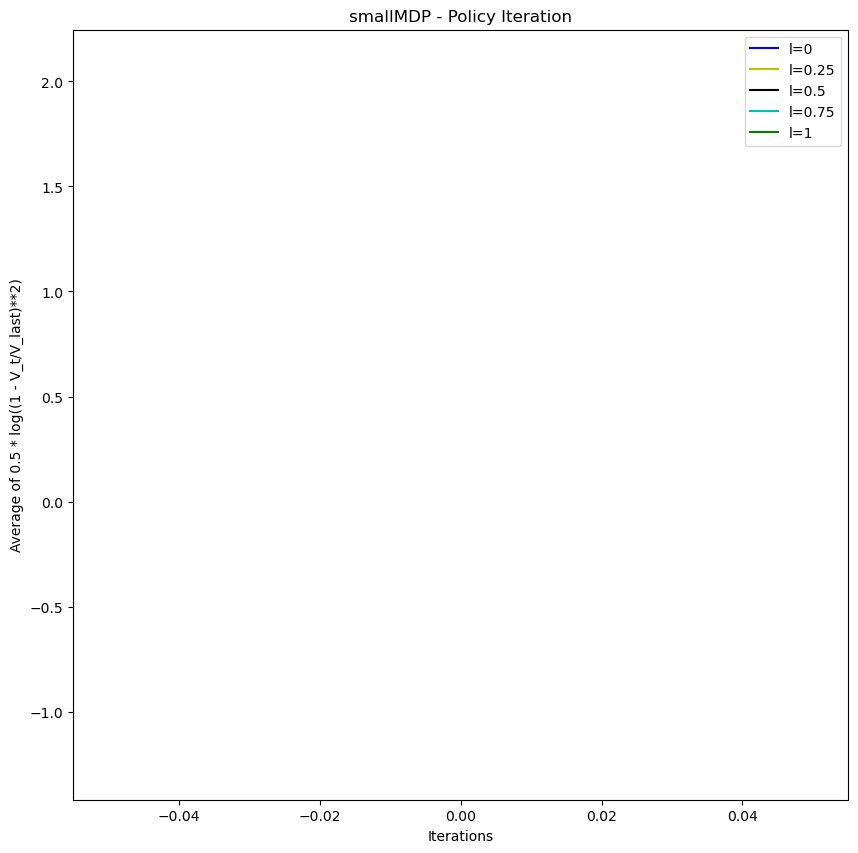

In [38]:
fileList = ['PI_smallMDP_l=0_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=0.25_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=0.5_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=0.75_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_l=1_n_iter=100_max_iter=1000_fill_value=-99999.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Policy Iteration'

plotting_trans_div(fileList, labels, colors, title)

## PI with minimizing variance

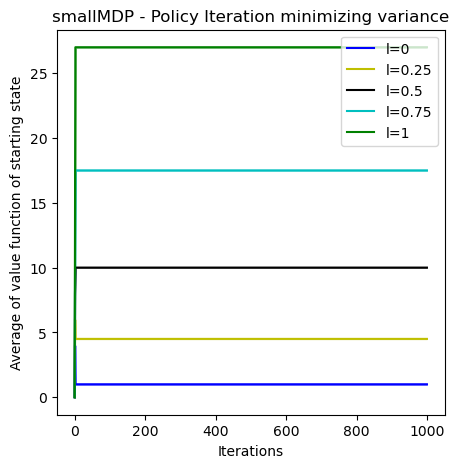

In [37]:
fileList = ['PI_smallMDP_mode=2_l=0_n_iter=10_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_mode=2_l=0.25_n_iter=10_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_mode=2_l=0.5_n_iter=10_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_mode=2_l=0.75_n_iter=10_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_mode=2_l=1_n_iter=10_max_iter=1000_fill_value=-99999.csv']
labels = ['l=0', 'l=0.25', 'l=0.5', 'l=0.75', 'l=1']
colors = ['b', 'y', 'k', 'c', 'g']
title = 'smallMDP - Policy Iteration minimizing variance'

plotting(fileList, labels, colors, title)


## small MDP - policy iteration

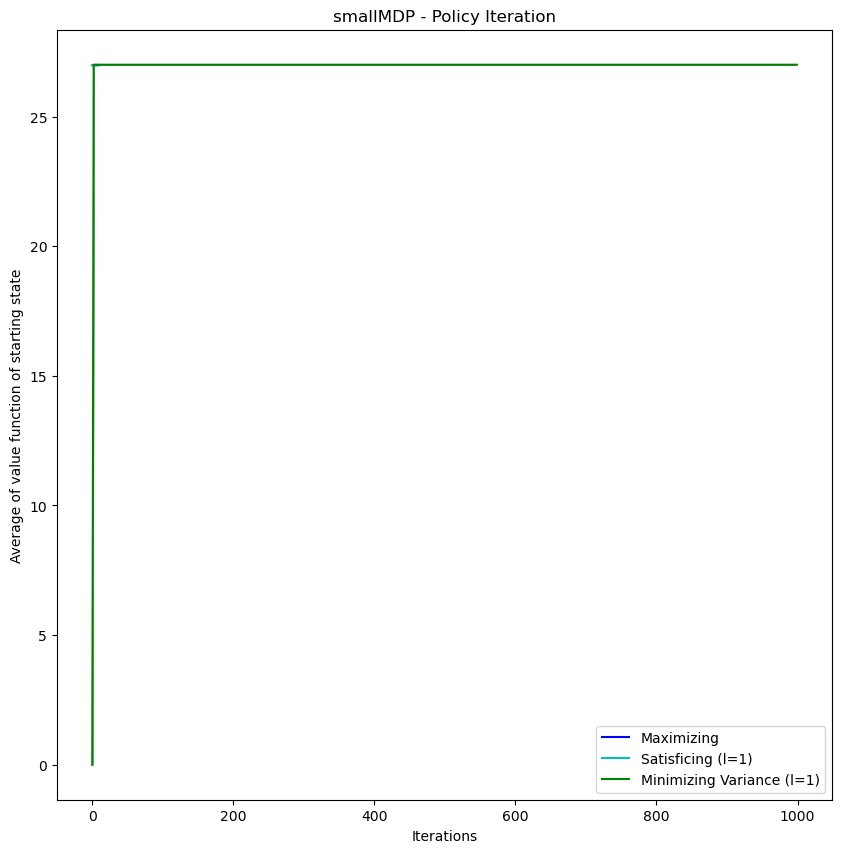

In [31]:
fileList = ['PI_smallMDP_max-n_iter=100-max_iter_PI=1000_fill=-99999.csv', 'PI_smallMDP_l=1_n_iter=100_max_iter=1000_fill_value=-99999.csv', 'PI_smallMDP_mode=2_l=1_n_iter=10_max_iter=1000_fill_value=-99999.csv']
labels = ['Maximizing', 'Satisficing (l=1)', 'Minimizing Variance (l=1)']
colors = ['b', 'c', 'g', 'k']
title = 'smallMDP - Policy Iteration'

plotting(fileList, labels, colors, title)

## Q-learning

In [ ]:
np.array(list(map(lambda x : x[0] + x[1], zip([1,10], [2,20]))))

array([ 3, 30])

In [ ]:
for i, j in (zip([1,10,10,10], [2,20,10])):
    print(i,j)

1 2
10 20
10 10


# another title